# Running YOLO v3 with OpenCV

For running YOLO v3 using OpenCV, we need to download the code and weights of the model first using the following URLs
- Code: `https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip`
- Weights: `https://pjreddie.com/media/files/yolov3.weights`



# Load Files via Google Drive
This step will work only with Google Colab.
1. Download the files from the URLs given above to your local computer.
1. Unzip the file named `yolo_object_detection.zip`.
1. Upload the file `yolov3.weights` to the folder `yolo_object_detection` in your Google Drive

In [ ]:
# Connect Colab with Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Download Files Directly

In [ ]:
# Download code in Drive
# !wget -P /cd gdrive/My Drive/ https://pysource.com/wp-content/uploads/2019/06/yolo_object_detection.zip
# !unzip yolo_object_detection.zip
# !rm -r *.py *.zip *.jpg


In [ ]:
# Navigate to downloaded directory 
%cd gdrive/My Drive/yolo_object_detection

/content/gdrive/My Drive/frames/yolo_object_detection


In [ ]:
# Download weights in a specific folder
# !wget -P /cd gdrive/My Drive/yolo_object_detection https://pjreddie.com/media/files/yolov3.weights

# Imports

In [ ]:
import cv2
import numpy as np


In [ ]:
# If the notebook is being run on Google Colab, run this cell
from google.colab.patches import cv2_imshow

In [ ]:
# If the notebook is being run locally, run this cell
# from cv2 import imshow as cv2_imshow

# Load YOLO v3

In [ ]:
# Loading model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Loading classes
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# printing classes
print(*classes, sep = "\n") 
# Getting layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

person
bicycle
car
motorbike
aeroplane
bus
train
truck
boat
traffic light
fire hydrant
stop sign
parking meter
bench
bird
cat
dog
horse
sheep
cow
elephant
bear
zebra
giraffe
backpack
umbrella
handbag
tie
suitcase
frisbee
skis
snowboard
sports ball
kite
baseball bat
baseball glove
skateboard
surfboard
tennis racket
bottle
wine glass
cup
fork
knife
spoon
bowl
banana
apple
sandwich
orange
broccoli
carrot
hot dog
pizza
donut
cake
chair
sofa
pottedplant
bed
diningtable
toilet
tvmonitor
laptop
mouse
remote
keyboard
cell phone
microwave
oven
toaster
sink
refrigerator
book
clock
vase
scissors
teddy bear
hair drier
toothbrush


# Load Image

In [ ]:
# Give path to image
img_path = 'image.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detect Objects

In [ ]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

In [ ]:
# Showing information on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
# Applying Non-Maximum Suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y - 10), font, 0.7, color, 1)

# Display Output

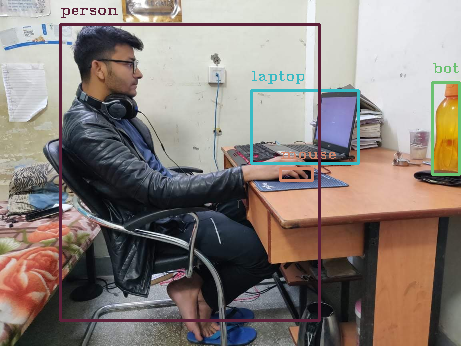

In [ ]:
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite('image_opencv.jpg', img)

True